In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix , recall_score , precision_score , f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from collections import Counter
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn import svm
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
init_notebook_mode(connected=True)

## Reading the dataset

In [71]:
df = pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [72]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [73]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Class Distribution

In [74]:
data = go.Bar(x=['Fraudulent','Non-fraudulent '] , y=[Counter(df['Class'])[0],Counter(df['Class'])[1]] ,
              )

layout = go.Layout(title='Distribution of Transcation')
figure = go.Figure(data=[data],layout=layout)
iplot(figure)

In [105]:
print(df['Class'].value_counts()) 
print('By Percentage %s' % df['Class'].value_counts(True))

0    284315
1       492
Name: Class, dtype: int64
By Percentage 0    0.998273
1    0.001727
Name: Class, dtype: float64


## Removing Time , Amount feature data

In [76]:
data = df[ list(set(df.columns)-set(['Time','Amount','Class'])) ]
label = df['Class']

## Splitting The data in Training-set and Test-Set

In [84]:
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size=0.30)

In [85]:
#Training Model Using Grid-Search and SVM

scaler = StandardScaler()
os = SMOTE()
model = svm.SVC()



#Defining the pipeline
pipe = Pipeline([('os',os),('scaler',scaler),('svm',model)])

#Defining grid parameters
param_grid = {"svm__C": np.logspace(0, 1, 4),"os__ratio":np.linspace(0.005, 0.05, 10)}

#"svm__kernel":['linear', 'poly', 'rbf',
#           'sigmoid', 'precomputed'],
#           "svm__gamma":np.linspace(0, 0.5, 10)


#Final Grid
grid = GridSearchCV(pipe, param_grid, cv=2,scoring='f1')

In [87]:
grid.fit(x_train,y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('os', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svm__C': array([ 1.     ,  2.15443,  4.64159, 10.     ]), 'os__ratio': array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [91]:
#Getting Splits Scores
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_os__ratio,param_svm__C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,34.279133,2.445194,8.715811,0.005722,0.005,1,"{'os__ratio': 0.005, 'svm__C': 1.0}",0.805195,0.769759,0.787477,0.017718,25,0.909091,0.903030,0.906061,0.003030
1,30.219074,0.657279,7.970293,0.045855,0.005,2.15443,"{'os__ratio': 0.005, 'svm__C': 2.154434690031884}",0.805195,0.784983,0.795089,0.010106,13,0.943284,0.940476,0.941880,0.001404
2,25.707020,0.074026,7.373015,0.101318,0.005,4.64159,"{'os__ratio': 0.005, 'svm__C': 4.641588833612778}",0.807818,0.795987,0.801902,0.005915,5,0.970588,0.949555,0.960072,0.010517
3,23.002760,0.537487,6.705118,0.105883,0.005,10,"{'os__ratio': 0.005, 'svm__C': 10.0}",0.798701,0.778157,0.788429,0.010272,24,0.973451,0.970760,0.972106,0.001346
4,28.500607,0.242748,8.307390,0.078881,0.01,1,"{'os__ratio': 0.010000000000000002, 'svm__C': ...",0.796178,0.771812,0.783995,0.012183,27,0.922619,0.922619,0.922619,0.000000
5,25.281631,0.697124,7.464396,0.071045,0.01,2.15443,"{'os__ratio': 0.010000000000000002, 'svm__C': ...",0.811502,0.809365,0.810433,0.001069,1,0.962099,0.937685,0.949892,0.012207
6,23.146872,0.806716,7.448275,0.687187,0.01,4.64159,"{'os__ratio': 0.010000000000000002, 'svm__C': ...",0.802508,0.791946,0.797227,0.005281,9,0.974063,0.965318,0.969691,0.004373
7,21.789850,2.903039,6.832147,0.707797,0.01,10,"{'os__ratio': 0.010000000000000002, 'svm__C': ...",0.779874,0.791946,0.785910,0.006036,26,0.982659,0.971098,0.976879,0.005780
8,27.023766,1.333799,8.665436,0.184605,0.015,1,"{'os__ratio': 0.015000000000000003, 'svm__C': ...",0.801242,0.792079,0.796661,0.004582,11,0.939481,0.928994,0.934238,0.005244
9,23.662062,0.347424,7.443961,0.130531,0.015,2.15443,"{'os__ratio': 0.015000000000000003, 'svm__C': ...",0.811321,0.801325,0.806323,0.004998,2,0.959302,0.950147,0.954724,0.004578


In [94]:
print("Best parameters : %s" % grid.best_params_)

Best parameters : {'os__ratio': 0.010000000000000002, 'svm__C': 2.154434690031884}


In [96]:
pipe1 = make_pipeline(SMOTE(ratio=0.010000000000000002),StandardScaler(),svm.SVC(C=2.154434690031884)
                     )

# Model Fit
pipe1.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('smote', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=0.010000000000000002,
   sampling_strategy=0.010000000000000002, svm_estimator='deprecated')), ('standardscaler', StandardScaler(copy=True, with_mean=True, ...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [97]:
y_pred = pipe1.predict(x_test)

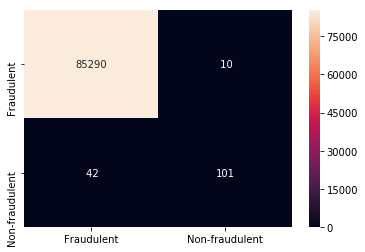

In [98]:
sns.heatmap( confusion_matrix(list(y_test),list(pipe1.predict(x_test))
             ),annot=True,fmt='3g',xticklabels=['Fraudulent','Non-fraudulent'],
           yticklabels=['Fraudulent','Non-fraudulent'])   

In [103]:
recall = recall_score(list(y_test),list(pipe1.predict(x_test)) ,average=None )
                      
precision = precision_score(list(y_test),list(pipe1.predict(x_test)) , average=None )
                            
print('The recall score for Fraudulent {}'.format(recall[0]))
print('The recall score for non-Fraudulent {}'.format(recall[1]))
                            
print('The precision score for Fraudulent {}'.format(precision[0]))
print('The precision score for non-Fraudulent {}'.format(precision[1]))

print('The Accuray of the model is {}'.format(accuracy_score(y_test, pipe1.predict(x_test) )))

The recall score for Fraudulent 0.9998827667057444
The recall score for non-Fraudulent 0.7062937062937062
The precision score for Fraudulent 0.9995078048094501
The precision score for non-Fraudulent 0.9099099099099099
The Accuray of the model is 0.9993914071369217


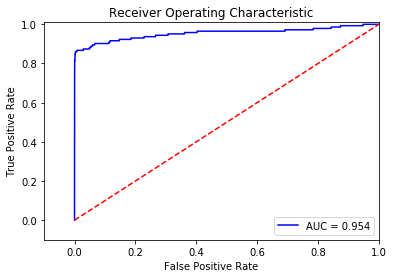

In [100]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

y_pred_sample_score = pipe1.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()